## 4-MFR Regression

The is objective is to minimize a loss function such as a sum of squared errors between the measured and predicted values:

$Loss = \sum_{i=1}^{n}\left(y_i-z_i\right)^2$

where `n` is the number of observations. Regression requires labelled data (output values) for training. Classification, on the other hand, can either be supervised (with `z` measurements, labels) or unsupervised (no labels, `z` measurements).

```python
import pickle
with open('mfr_data.pkl', 'rb') as handle:
    info = pickle.load(handle)
data,test,train,ds,s = info
```

Load the `pkl` file from the prior notebook.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
with open('mfr_data.pkl', 'rb') as handle:
    info = pickle.load(handle)
data,test,train,ds,s = info
data.head()

,C3=,H2R,Pressure,Level,C2=,Cat,Temp,lnMFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,1.223775
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,1.163151
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,1.163151
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,1.131402
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,1.193922


![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Linear Regression

There are many model forms such as linear, polynomial, and nonlinear. A familiar linear model is a line with slope `a` and intercept `b` with `y = a x + b`.   
    
```python
x = data['H2R'].values
z = data['lnMFR'].values
p1 = np.polyfit(x,z,1)
```
    
A simple method for linear regression is with `numpy` to fit `p=np.polyfit(x,y,1)` and evaluate `np.polyval(p,x)` the model. Determine the slope and intercept that minimize the sum of squared errors (least squares) between the predicted `lnMFR` and measured `lnMFR` output using `H2R` as the input.

Slope, Intercept:[4.0715357  1.12699813]


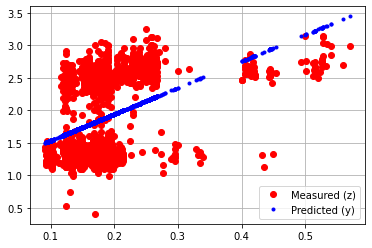

In [11]:
x = data['H2R'].values
z = data['lnMFR'].values
p1 = np.polyfit(x,z,1)
print('Slope, Intercept:' + str(p1))

plt.plot(x,z,'ro',label='Measured (z)')
plt.plot(x,np.polyval(p1,x),'b.',label='Predicted (y)')
plt.legend(); plt.grid()
plt.show()

Another package is `statsmodels` that performs standard Ordinary Least Squares (OLS) analysis with a nice report summary.

```python
import statsmodels.api as sm
xc = sm.add_constant(x)
model = sm.OLS(z,xc).fit()
predictions = model.predict(xc)
model.summary()
```

The input `x` is augmented with a ones column so that it also predicts the intercept. This is accomplished with `xc=sm.add_constant(x)`. Perform a multiple linear regression with all of the data columns to predict `lnMFR`.

In [12]:
x_columns = data.columns[0:-1]; print(x)
z_column  = data.columns[-1]; print(z)

x = data[x_columns]
z = data[z_column]

[0.153 0.153 0.153 ... 0.25  0.185 0.185]
[1.22377543 1.16315081 1.16315081 ... 2.43361336 2.60268969 2.50959926]


In [13]:
import statsmodels.api as sm
xc = sm.add_constant(x)
model = sm.OLS(z,xc).fit()
predictions = model.predict(xc)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnMFR   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     296.7
Date:                Sat, 20 Nov 2021   Prob (F-statistic):          3.54e-321
Time:                        21:07:11   Log-Likelihood:                -1610.6
No. Observations:                2464   AIC:                             3237.
Df Residuals:                    2456   BIC:                             3284.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.9767      1.621     -8.004      0.000     -16.156      -9.797
C3=        -5.203e-05   6.78e-06     -7.671      0.000   -6.53e-05   -3.87e-05
H2R            3.4083      0.158     21.602      0.000       3.099       3.718
Pressure       0.4170      0.024     17.300      0.000       0.370       0.464
Level         -0.0429      0.011     -3.917      0.000      -0.064      -0.021
C2=         1.066e-05   1.06e-06     10.093      0.000    8.59e-06    1.27e-05
Cat           -4.5664      0.249    -18.333      0.000      -5.055      -4.078
Temp           0.0782      0.013      6.184      0.000       0.053       0.103
==============================================================================
Omnibus:                       60.235   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.851
Skew:                           0.361   Prob(JB):                     5.02e-15
Kurtosis:                       3.348   Cond. No.                     8.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Select Best Features

Rank the features to determine the best set that predicts `lnMFR`.

```python
from sklearn.feature_selection import SelectKBest, f_regression
best = SelectKBest(score_func=f_regression, k='all')
fit = best.fit(x,z)
plt.bar(x=x.columns,height=fit.scores_)
```

There is additional information on [Select K Best Features](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html).

<BarContainer object of 7 artists>

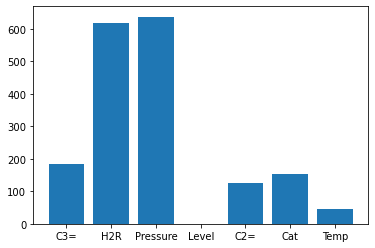

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression
best = SelectKBest(score_func=f_regression, k='all')
fit = best.fit(x,z)
plt.bar(x=x.columns,height=fit.scores_)

![exercise](https://apmonitor.com/che263/uploads/Begin_Python/exercise.png)

### Machine Learning

Machine learning is computer algorithms and statistical models that rely on patterns and inference. They perform a specific task without explicit instructions. Machine learned regression models can be as simple as linear regression or as complex as deep learning. This tutorial demonstrates several regression methods with `scikit-learn`.

#### Function for Plotting

Run this code so that each of the regressor models will train and display on a 3D scatter and surface plot with `Pressure` and `lnMFR`.

In [15]:
def fit(method):
    # create points for plotting surface
    xp = np.arange(-5, 5, 0.2)
    yp = np.arange(-5, 5, 0.2)
    XP, YP = np.meshgrid(xp, yp)

    model = method.fit(train[['H2R','Pressure']],train['lnMFR'])
    zp = method.predict(np.vstack((XP.flatten(),YP.flatten())).T)
    ZP = zp.reshape(np.size(XP,0),np.size(XP,1))

    r2 = method.score(test[['H2R','Pressure']],test['lnMFR'])
    print('R^2: ' + str(r2))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(ds['H2R'],ds['Pressure'],ds['lnMFR'],c=z,cmap='plasma',label='data')
    ax.plot_surface(XP, YP, ZP, cmap='coolwarm',alpha=0.7,
                    linewidth=0, antialiased=False)
    plt.show()
    return

#### Linear Regression with `sklearn`

The simplest regressor is a linear model.

```python
from sklearn import linear_model
lm = linear_model.LinearRegression()
fit(lm)
```

This model is not expected to perform very well with the nonlinear data but it does predict the slope of the data.

C:\Users\johnh\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


R^2: 0.32594039486482773


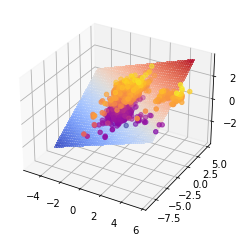

In [16]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
fit(lm)

#### K-Nearest Neighbors

Use the `KNeighborsRegressor` and adjust the `n_neighbors=20` to achieve a better $R^2$ value.

```python
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=20)
fit(knn)
```

`n_neighbors` is an example of a hyper-parameter that can be optimized by a package such as `hyperopt` or with user experience.

C:\Users\johnh\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


R^2: 0.5584683993516927


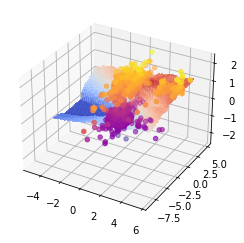

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=20)
fit(knn)

#### Support Vector Regressor

Use a Support Vector Regressor (`SVR`) to perform the regression.

```python
from sklearn import svm
s = svm.SVR(gamma='scale')
fit(s)
```

What are the hyper-parameters for this regressor?

C:\Users\johnh\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


R^2: 0.543061193744459


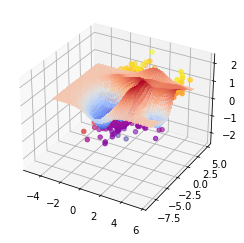

In [18]:
from sklearn import svm
s = svm.SVR(gamma='scale')
fit(s)

#### Multilayer Perceptron (Neural Network)

Train a neural network to predict the `lnMFR`.

```python
from sklearn.neural_network import MLPRegressor
# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
nn = MLPRegressor(hidden_layer_sizes=(3), 
                  activation='tanh', solver='lbfgs')
fit(nn)
```

Adust the `hidden_layer_sizes` such as with deep learning `(3,5,3)` to achieve a better fit.

C:\Users\johnh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\johnh\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


R^2: 0.23626076592367296


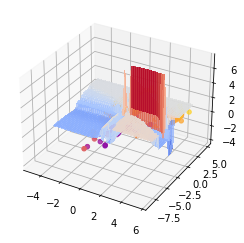

In [24]:
from sklearn.neural_network import MLPRegressor
# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
nn = MLPRegressor(hidden_layer_sizes=(5,3,5), 
                  activation='tanh', solver='lbfgs', max_iter=10000)
fit(nn)

### Additional Features

Repeat the analysis but now generate a parity plot of measured versus predicted values with all features, not just `Pressure` and `H2R`.

In [25]:
def fitn(method):
    f = train.columns
    model = method.fit(train[f[0:-1]],train['lnMFR'])

    r2 = method.score(test[f[0:-1]],test['lnMFR'])
    print('R^2: ' + str(r2))
    
    MFR_pred = method.predict(test[f[0:-1]])
    
    plt.plot(test['lnMFR'],MFR_pred,'b.')
    plt.plot([-1,2],[-1,2],'k-')

    return

#### Linear Regression

```python
lm = linear_model.LinearRegression()
fitn(lm)
```

R^2: 0.44948704842271126


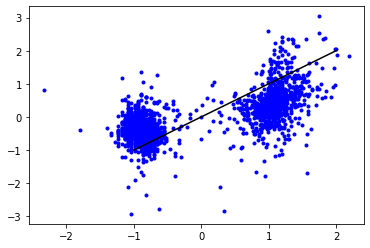

In [26]:
lm = linear_model.LinearRegression()
fitn(lm)

#### K Nearest Neighbors

```python
knn = KNeighborsRegressor(n_neighbors=20)
fitn(knn)
```

R^2: 0.6696301009660127


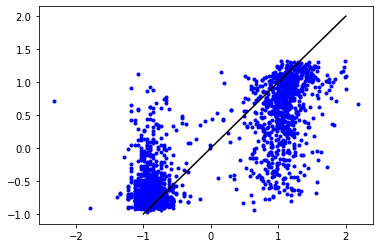

In [27]:
knn = KNeighborsRegressor(n_neighbors=20)
fitn(knn)

#### Support Vector Regressor

```python
s = svm.SVR(gamma='scale')
fitn(s)
```

R^2: 0.7141158018791134


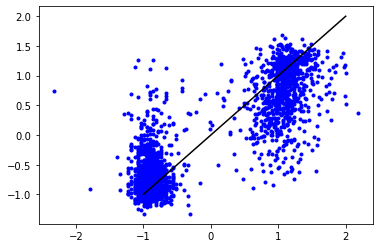

In [28]:
s = svm.SVR(gamma='scale')
fitn(s)

#### Neural Network

```python
nn = MLPRegressor(hidden_layer_sizes=(3), max_iter=1000, \
                  activation='tanh', solver='lbfgs')
fitn(nn)
```

R^2: 0.5639524119833719


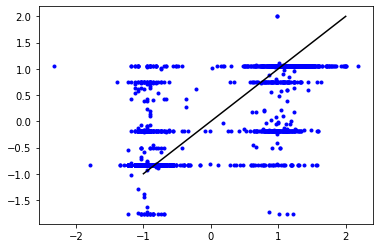

In [29]:
nn = MLPRegressor(hidden_layer_sizes=(3), max_iter=1000, \
                  activation='tanh', solver='lbfgs')
fitn(nn)

Repeat the neural network fit but use TensorFlow and Keras instead of Scikit-learn

In [30]:
from keras.models import Sequential
from keras.layers import *

#################################################################
### Train model #################################################
#################################################################
f = train.columns
n_inputs = len(f)-1
nodes = 10

# create neural network model
model = Sequential()
model.add(Dense(n_inputs, input_dim=n_inputs, activation='linear'))
model.add(Dense(nodes, activation='linear'))
model.add(Dense(nodes, activation='tanh'))
model.add(Dense(nodes, activation='tanh'))
model.add(Dense(nodes, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam")

# load training data
X1 = train.drop('lnMFR', axis=1).values
Y1 = train[['lnMFR']].values

# train the model
model.fit(X1,Y1,epochs=300,verbose=1,shuffle=True)

# Save the model to hard drive
#model.save('model.h5')

Epoch 1/300
16/16 [==============================] - 0s 667us/step - loss: 0.8545
Epoch 2/300
16/16 [==============================] - 0s 600us/step - loss: 0.5615
Epoch 3/300
16/16 [==============================] - 0s 600us/step - loss: 0.4667
Epoch 4/300
16/16 [==============================] - 0s 1ms/step - loss: 0.5056
Epoch 5/300
16/16 [==============================] - 0s 600us/step - loss: 0.4369
Epoch 6/300
16/16 [==============================] - 0s 734us/step - loss: 0.4884
Epoch 7/300
16/16 [==============================] - 0s 667us/step - loss: 0.4361
Epoch 8/300
16/16 [==============================] - 0s 600us/step - loss: 0.4344
Epoch 9/300
16/16 [==============================] - 0s 1ms/step - loss: 0.4085
Epoch 10/300
16/16 [==============================] - 0s 534us/step - loss: 0.4273
Epoch 11/300
16/16 [==============================] - 0s 533us/step - loss: 0.4691
Epoch 12/300
16/16 [==============================] - 0s 600us/step - loss: 0.3919
Epoch 13/300
16/1

Epoch 100/300
16/16 [==============================] - 0s 600us/step - loss: 0.2796
Epoch 101/300
16/16 [==============================] - 0s 1ms/step - loss: 0.2618
Epoch 102/300
16/16 [==============================] - 0s 600us/step - loss: 0.2728
Epoch 103/300
16/16 [==============================] - 0s 600us/step - loss: 0.2439
Epoch 104/300
16/16 [==============================] - 0s 667us/step - loss: 0.2571
Epoch 105/300
16/16 [==============================] - 0s 1ms/step - loss: 0.2676
Epoch 106/300
16/16 [==============================] - 0s 600us/step - loss: 0.2435
Epoch 107/300
16/16 [==============================] - 0s 600us/step - loss: 0.2825
Epoch 108/300
16/16 [==============================] - 0s 667us/step - loss: 0.2068
Epoch 109/300
16/16 [==============================] - 0s 667us/step - loss: 0.2530
Epoch 110/300
16/16 [==============================] - 0s 600us/step - loss: 0.2578
Epoch 111/300
16/16 [==============================] - 0s 867us/step - loss: 0.2

16/16 [==============================] - 0s 533us/step - loss: 0.1763
Epoch 198/300
16/16 [==============================] - 0s 1ms/step - loss: 0.1970
Epoch 199/300
16/16 [==============================] - 0s 533us/step - loss: 0.1686
Epoch 200/300
16/16 [==============================] - 0s 534us/step - loss: 0.1505
Epoch 201/300
16/16 [==============================] - 0s 667us/step - loss: 0.2002
Epoch 202/300
16/16 [==============================] - 0s 934us/step - loss: 0.1738
Epoch 203/300
16/16 [==============================] - 0s 533us/step - loss: 0.1537
Epoch 204/300
16/16 [==============================] - 0s 533us/step - loss: 0.1625
Epoch 205/300
16/16 [==============================] - 0s 600us/step - loss: 0.1639
Epoch 206/300
16/16 [==============================] - 0s 533us/step - loss: 0.1838
Epoch 207/300
16/16 [==============================] - 0s 600us/step - loss: 0.1538
Epoch 208/300
16/16 [==============================] - 0s 533us/step - loss: 0.1612
Epoch 20

16/16 [==============================] - 0s 533us/step - loss: 0.1657
Epoch 295/300
16/16 [==============================] - 0s 800us/step - loss: 0.1403
Epoch 296/300
16/16 [==============================] - 0s 667us/step - loss: 0.1247
Epoch 297/300
16/16 [==============================] - 0s 667us/step - loss: 0.1482
Epoch 298/300
16/16 [==============================] - 0s 600us/step - loss: 0.1260
Epoch 299/300
16/16 [==============================] - 0s 800us/step - loss: 0.1366
Epoch 300/300
16/16 [==============================] - 0s 600us/step - loss: 0.1351


In [31]:
#################################################################
### Test model ##################################################
#################################################################

# Load the model from hard drive
#model.load('model.h5')

# load test data
X2 = test.drop('lnMFR', axis=1).values
Y2 = test[['lnMFR']].values

# test the model
mse = model.evaluate(X2,Y2, verbose=1)

print('Mean Squared Error: ', mse)

62/62 [==============================] - 0s 410us/step - loss: 0.2936
Mean Squared Error:  0.2935815453529358


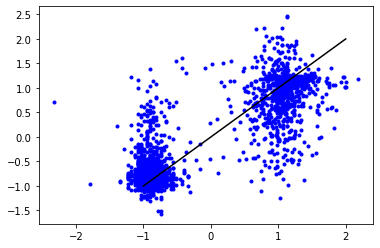

In [32]:
lnMFR_pred = model.predict(X2)
plt.plot(test['lnMFR'],lnMFR_pred,'b.')
plt.plot([-1,2],[-1,2],'k-')